In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)

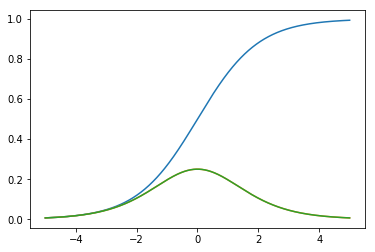

In [2]:
#sigmoid and its gradient 
from math import exp
def sigmoid(x):
    return 1 / (1+exp(-x))
def grad_sigmoid(x):
    return exp(-x)/(1+exp(-x))**2
def ds(x):
    return (1 - sigmoid(x))*sigmoid(x)
plot_function(sigmoid,-5,5)
plot_function(grad_sigmoid,-5,5)
plot_function(ds,-5,5)

In [3]:
#NN
import copy
class NeuralNetwork():
    def __init__(self,layer_sizes):
        mult=1
        self.layer_sizes = layer_sizes
        self.layer_count = len(layer_sizes)
        self.weights = [
            2*(np.random.randn(n,m) -0.5)*mult 
            for m,n in zip(layer_sizes[:-1],layer_sizes[1:])
        ]
        
    def feedforward(self,v):
        activationsOut = [v]
        activationsIn = [v]
        a = v #zeroth layer
        for layer,w in enumerate(self.weights):
            z = w @ a 
            if layer < self.layer_count-2:
                a = [sigmoid(x) for x in z]
            else:  # No activation for last layer
                a = z
            activationsOut.append(a)
            activationsIn.append(z)
        return activationsIn,activationsOut
    
    def backpropagate(self,a,u,y):
        d = np.array(copy.copy(a))*0
        epsilon=np.array([-oi+yi for yi,oi in zip(y,a[-1])])
        d[-1] = epsilon #no activation
        for layer in reversed(range(1,len(self.weights))):
            z = d[layer+1] @ self.weights[layer] 
            auz=[grad_sigmoid(node) for node in u[layer]]
            d[layer]= np.array(z)*np.array(auz)
        return d

    
    def dw(self,x,y,learning_rate=0.01):
        # only uses one training example!
        # dw is the correction needed to be applied on weights 
        u,a = self.feedforward(x)
        d = self.backpropagate(a,u,y)
        dw=copy.copy(self.weights)
        for layer,w in enumerate(self.weights):
            dw[layer] = learning_rate * np.outer(d[layer+1], a[layer])
        return dw
    
    
    def evaluate(self,v):
        _,a=self.feedforward(v)
        return np.array(a[-1])
    
    def cost(self,x,y):
        return np.linalg.norm(np.array(self.evaluate(x))-y)

    def train_simple(self,x,y,learning_rate=0.01,epochs=100):
        for epoch in range(epochs):
            err=[]
            for xi,yi in zip(x, y):
                dw = self.dw(xi,yi,learning_rate=learning_rate)
                for layer,_ in enumerate(self.weights):
                    self.weights[layer] += dw[layer] #by convention adding it dw to weights (it all depends on the definisiton of epsilons see haykin) 
                err.append(self.cost(xi,yi))
            print (epoch, np.mean(err),np.max(err))    
    

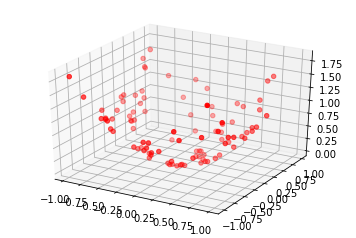

In [4]:
# 2D simple 2d input -> 1d output training set (easy visualization)
x=2*(np.random.rand(100,2)-0.5)
y=[(i[0])**2+(i[1])**2 for i in x]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y, c='r', marker='o')

In [5]:
#train
nn = NeuralNetwork([2,10,10,10,1])
nn.train_simple(x,[[yi] for yi in y],epochs=1000,learning_rate=0.1)

0 0.49905819681014707 2.4814130158164973
1 0.3725567156940997 1.0802638267764058
2 0.349112206907046 1.0573516809210188
3 0.3337420674902758 1.0366992083466595
4 0.3221888068335306 1.0155648354821438
5 0.3123767629650328 0.9927738832372457
6 0.3033942230850184 0.9679403406721478
7 0.29472496464573766 0.9413956160934803
8 0.28658215808889287 0.9426669157820229
9 0.2786623299058744 0.9476456874474715
10 0.27131880250979173 0.9474318390301428
11 0.2640652994528093 0.9376976275186919
12 0.25679687950469954 0.9092879340569582
13 0.24926980855255457 0.8468183533615978
14 0.24035732150836164 0.7748794898383227
15 0.23221936465972412 0.7540767557293586
16 0.22559606800958687 0.7337077649061075
17 0.22058301286197537 0.7159863766068328
18 0.21545782382866868 0.7016231935675834
19 0.21028482878949756 0.6897878572407923
20 0.20553384783868853 0.6794452224541632
21 0.2011686092647955 0.6698857914736149
22 0.1968486161228108 0.6607078234433073
23 0.19251431834513263 0.6516987217643702
24 0.18800205

197 0.02243518153908285 0.06594463329918177
198 0.0223628290121642 0.06582569669381844
199 0.02229098507550308 0.06570697250397939
200 0.02222028071871831 0.0655884600906298
201 0.022151275659791816 0.06547015896356267
202 0.02208274713269325 0.06535206877397748
203 0.022014690362577798 0.0652341893073034
204 0.021947100650646024 0.06511652047620053
205 0.021879973371989922 0.06499906231379216
206 0.021813303973524215 0.06488181496707601
207 0.021747087971997207 0.06476477869055475
208 0.02168132095207942 0.06464795384005284
209 0.021615998564526628 0.06453134086673762
210 0.021551116524412182 0.06441494031132677
211 0.02148667060942863 0.06429875279849684
212 0.021422656658253852 0.06418277903145775
213 0.021360955163334 0.06406701978673812
214 0.02129982638659171 0.06395147590912931
215 0.021239100020918337 0.0638361483068246
216 0.02117877222996591 0.06372103794671147
217 0.02111883923055929 0.06360614584985891
218 0.02105929729143547 0.06349147308715808
219 0.02100014273202737 0.06

388 0.015495734251421858 0.047831739291750885
389 0.015476664201543111 0.04776204980917553
390 0.015457659117614186 0.04769258709014812
391 0.015438718655980163 0.047623350263930275
392 0.015419842475159016 0.04755433845997592
393 0.015401030235826126 0.047485550808024524
394 0.015382281600799623 0.04741698643818726
395 0.015363596235024521 0.04734864448103515
396 0.015344973805559558 0.04728052406768013
397 0.01532641398156103 0.04721262432985962
398 0.015307916434268643 0.04714494440001982
399 0.015289480836992015 0.04707748341138718
400 0.015271106865094967 0.04701024049804792
401 0.015252794195981806 0.04694321479502994
402 0.015234542509083605 0.04687640543835592
403 0.015216351485843745 0.046809811565136084
404 0.015198220809704215 0.04674343231362332
405 0.015180150166091342 0.04667726682328466
406 0.015162139242402818 0.04661131423486342
407 0.015144187727993823 0.04654557369044854
408 0.015126295314163042 0.04648004433352737
409 0.015108461694139987 0.046415004943943794
410 0.

578 0.012791247077672891 0.03821454704032301
579 0.012780611164136573 0.03817436140435082
580 0.012770000083060912 0.03813425792411729
581 0.012759413731258464 0.038094236371516876
582 0.01274885200610485 0.03805429651937353
583 0.01273831480553606 0.038014438141446893
584 0.012727802028043855 0.03797466101241853
585 0.012717313572673892 0.037934964907884394
586 0.012706910043385833 0.03789534960435459
587 0.012696620734724471 0.03785581487924383
588 0.012686354806206305 0.037816360510866565
589 0.012676112162708168 0.03777698627843207
590 0.012665892709616154 0.037737691962036024
591 0.012655696352822486 0.03769847734265719
592 0.012645522998722271 0.037659342202147394
593 0.012635372554210704 0.03762028632323311
594 0.012625244926680093 0.03758130948950478
595 0.012615140024016218 0.03754241148541149
596 0.012605057754596194 0.03750359209625587
597 0.01259499802728499 0.03746485110818765
598 0.012584960751432606 0.03742618830820432
599 0.012574945836871375 0.03738760348413428
600 0.0

761 0.011197403271733209 0.03216210342645007
762 0.011190238749240784 0.032145973460975
763 0.011183086355623048 0.032129880898506186
764 0.011175946051849675 0.03211382558251438
765 0.011168817799069353 0.032097807357361424
766 0.01116170155861057 0.03208182606832086
767 0.011154597291978105 0.03206588156154108
768 0.011147504960854421 0.03204997368406601
769 0.01114042452709723 0.03203410228381262
770 0.011133355952738839 0.03201826720956477
771 0.011126299199985359 0.032002468310978055
772 0.01111925423121564 0.031986705438562274
773 0.011112221008980419 0.031970978443680326
774 0.011105199496000978 0.031955287178539765
775 0.011098189655167916 0.03193963149619236
776 0.011091191449542024 0.03192401125052344
777 0.01108420484235112 0.031908426296247655
778 0.011077229796989791 0.031892876488895466
779 0.011070270707873147 0.03187736168482466
780 0.011063397808413603 0.031861881741196835
781 0.011056536128981179 0.031846436515981597
782 0.011049685634400324 0.03183102586794903
783 0.

943 0.010088414666194583 0.029719569857721256
944 0.010083095350082063 0.0297083409889016
945 0.01007778277690617 0.02969713127933124
946 0.010072476930372958 0.029685940667179195
947 0.010067177794248061 0.029674769090885816
948 0.010061885352356905 0.029663616489170347
949 0.010056599588584424 0.029652482801023367
950 0.010051320486873965 0.029641367965710347
951 0.010046048031228588 0.029630271922762325
952 0.010040782205708792 0.02961919461198345
953 0.01003552299443404 0.029608135973441668
954 0.010030270381581123 0.0295970959474727
955 0.010025024351385163 0.02958607447467651
956 0.01001978488813796 0.029575071495913735
957 0.010014551976188533 0.029564086952307916
958 0.01000932559994299 0.029553120785237946
959 0.01000410574386368 0.029542172936347394
960 0.009998892392469778 0.029531243347532515
961 0.009993685530335474 0.02952033196094625
962 0.009988485142091587 0.02950943871899156
963 0.009983291212423941 0.029498563564327646
964 0.009978103726073759 0.029487706439865508
96

<Figure size 1440x720 with 0 Axes>

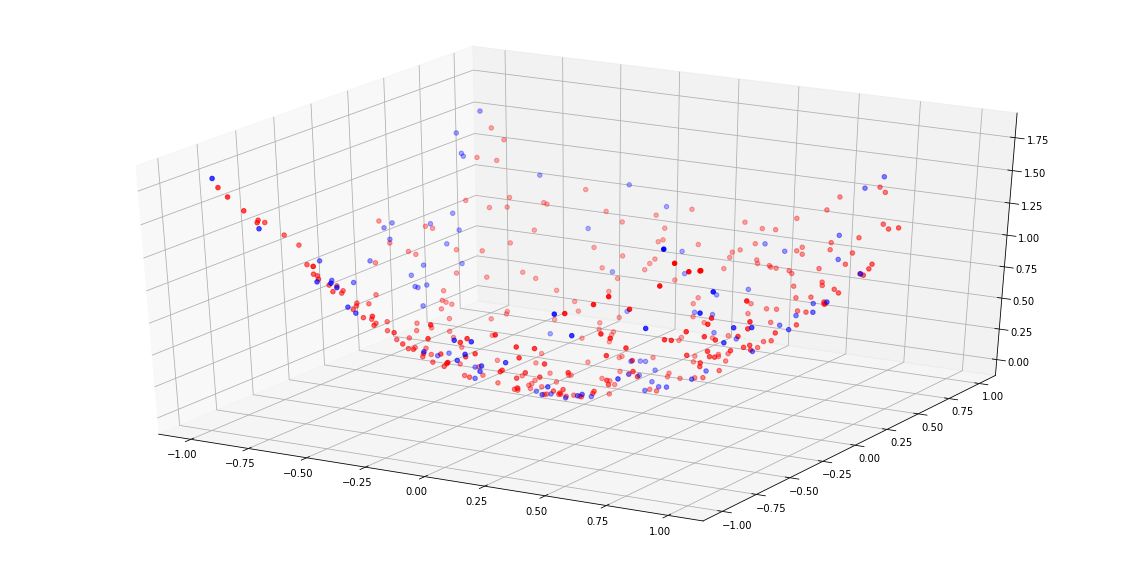

<Figure size 1440x720 with 0 Axes>

In [6]:
xx=2*(np.random.rand(300,2)-0.5)
plt.rcParams['figure.figsize'] = [20, 10]
yy=[nn.evaluate(i)[0] for i in xx]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xx[:,0], xx[:,1], yy, c='r', marker='o')
ax.scatter(x[:,0], x[:,1], y, c='b', marker='o')
plt.figure()

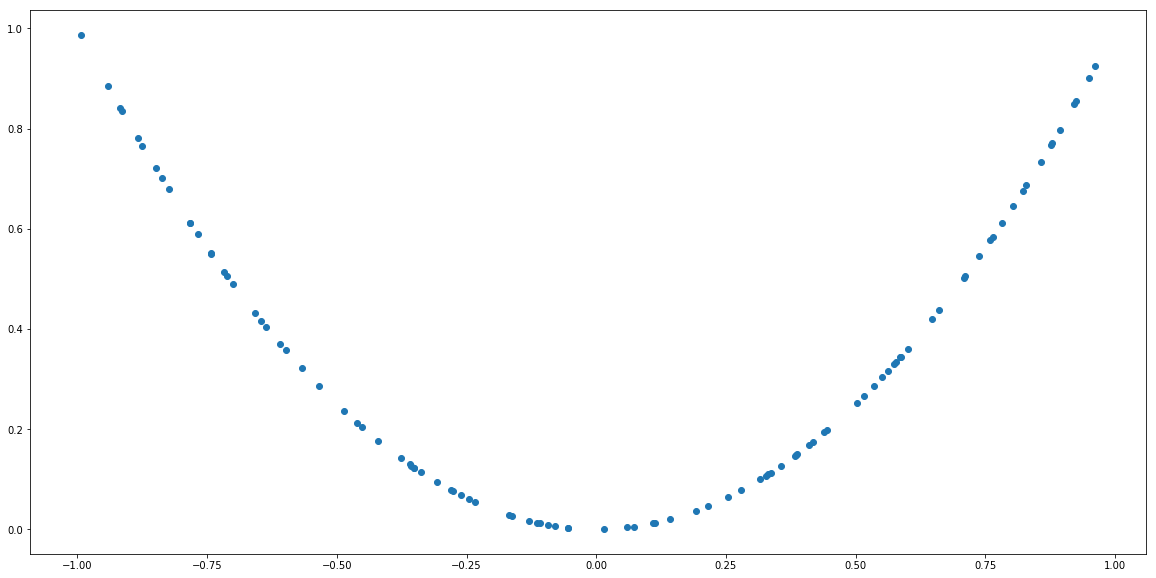

In [7]:
#1D
#simple 1d input -> 1d output training set (easy visualization)
x=2*(np.random.rand(100,1)-0.5)
y=(x)**2
plt.plot(x,y,'o')

In [8]:
#train
nn = NeuralNetwork([1,10,10,10,1])
nn.train_simple(x,y,epochs=1000,learning_rate=0.01)


0 1.093241794756751 2.8131485507072562
1 0.3809528277153773 1.016818472166458
2 0.30232324684096085 0.8561764440232464
3 0.29289033055235175 0.7956160314430792
4 0.29094503290160684 0.7693247721518582
5 0.2879032912171625 0.7555900815046798
6 0.28468753674912306 0.7469307421920403
7 0.2816646057167363 0.7406389365282395
8 0.2787897499686561 0.7356558681768034
9 0.27608395877814557 0.7315150975538404
10 0.27353928643937137 0.7279768361309145
11 0.2711407697706951 0.7248971967815815
12 0.26889748574699246 0.7221788942214445
13 0.2667836012780528 0.7197509810734696
14 0.2647711972117827 0.7175594204567647
15 0.2628508232188884 0.7155620186455843
16 0.2610320971918631 0.7137253181233254
17 0.2592977271107366 0.7120225008033272
18 0.2576318047324073 0.7104318854751722
19 0.256028909771831 0.7089358125683689
20 0.25448417353766567 0.7075197989073052
21 0.25299320316257157 0.7061718884070285
22 0.25155201930998117 0.7048821484215331
23 0.25015700437244404 0.7036422760177372
24 0.2488048589181

196 0.07864291948662486 0.3675868455117558
197 0.07836112784180575 0.36605159897366624
198 0.07808308698997835 0.36453353987308934
199 0.0778134548507692 0.363032155966586
200 0.077546321716326 0.36154695055844066
201 0.07728090353982049 0.36007744255532403
202 0.07701401345621965 0.35862316646312
203 0.07674573373075941 0.357183672331702
204 0.076476144949913 0.35575852565311317
205 0.07620532600114535 0.3543473072181559
206 0.07593335405881832 0.3529496129361639
207 0.0756603045756849 0.3515650536223026
208 0.07539600134594047 0.3501932547564728
209 0.07513265808650313 0.3488338562175469
210 0.07486820829366586 0.34748651199643876
211 0.07460272731302582 0.3461508898911211
212 0.07433628860081246 0.34482667118656907
213 0.07407494926773675 0.34351355032224207
214 0.07381650622949541 0.3422112345495777
215 0.07355716359027942 0.3409194435816626
216 0.0732969922284944 0.3396379092371312
217 0.07303606105800774 0.3383663750800766
218 0.0727744370618755 0.337104596057607
219 0.0725121853

392 0.044196798644663124 0.20528603757588426
393 0.04410608273670922 0.20489708346999014
394 0.044015694181578635 0.2045109607525869
395 0.04392563160164078 0.20412764593797517
396 0.04383589361464696 0.2037471156530234
397 0.0437464788341443 0.20336934663903616
398 0.04365738586987968 0.20299431575351845
399 0.04356861332818837 0.20262199997189823
400 0.043480159812371605 0.20225237638916427
401 0.043392023923063024 0.20188542222143224
402 0.043304204258581225 0.2015211148074464
403 0.04321669941527074 0.20115943161002037
404 0.04312950798783528 0.20080035021741482
405 0.0430426285696561 0.20044384834462303
406 0.042956059753103 0.20008990383463654
407 0.04286980012983241 0.1997384946596249
408 0.04278384829107784 0.19938959892203956
409 0.04269820282792888 0.19904319485569844
410 0.0426128623316023 0.19869926082678224
411 0.042527825393702 0.19835777533477306
412 0.04244309060647224 0.19801871701335594
413 0.042358656563041 0.19768206463125482
414 0.04227452185765495 0.19734779709301

579 0.03259548577509324 0.16300188834861828
580 0.03255182862379348 0.1628699909967536
581 0.032508266066059804 0.16273862010625406
582 0.03246479787119569 0.16260777137175852
583 0.032421423808227434 0.16247744053270596
584 0.03237814364592321 0.16234762337286435
585 0.032334957152808215 0.16221831571984946
586 0.03229186409718324 0.16208951344465639
587 0.032248864247141185 0.1619612124612052
588 0.032205957370583044 0.1618334087258656
589 0.032163143235234656 0.16170609823701365
590 0.032120421608662394 0.1615792770345742
591 0.03207779225828957 0.1614529411995832
592 0.03203525495141028 0.16132708685373054
593 0.03199280945520637 0.16120171015893636
594 0.03195045553676197 0.16107680731690965
595 0.03190819296307752 0.16095237456872125
596 0.031866021501084564 0.16082840819437416
597 0.03182394091766057 0.16070490451238706
598 0.031781950979642225 0.16058185987938145
599 0.0317400514538392 0.16045927068966204
600 0.031698242107048524 0.16033713337480526
601 0.031656522706066885 0.1

771 0.025706602857359283 0.14404651421031167
772 0.02567747935684385 0.14397010002309896
773 0.025648410531332388 0.1438938433432927
774 0.02561939622991489 0.14381774346599563
775 0.02559081457041217 0.14374179969179635
776 0.025562446006296688 0.14366601132670997
777 0.025534130078578823 0.14359037768213245
778 0.02550586664586019 0.14351489807476792
779 0.025477655567197176 0.14343957182658407
780 0.02544949670210071 0.14336439826475778
781 0.025421389910536583 0.1432893767216189
782 0.025393335052922694 0.143214506534605
783 0.02536533199012991 0.1431397870461969
784 0.025337380583480798 0.1430652176038728
785 0.025309480694748733 0.1429907975600665
786 0.025281632186157244 0.1429165262720925
787 0.025253834920379345 0.14284240310212748
788 0.0252260887605367 0.14276842741713713
789 0.025198393570198187 0.14269459858883737
790 0.02517074921338007 0.14262091599364102
791 0.02514315555454443 0.14254737901261916
792 0.025115612458598204 0.14247398703144631
793 0.02508811979089281 0.14

965 0.021292287251398236 0.13155050701675808
966 0.021274833131048148 0.13149580277104744
967 0.021257406069070367 0.13144117930917065
968 0.02124000600583844 0.13138663641211867
969 0.021222632881910772 0.13133217386188278
970 0.021205286638029296 0.13127779144142904
971 0.021187967215118265 0.13122348893469782
972 0.02117067455428545 0.13116926612660273
973 0.021153583531853225 0.13111512280301596
974 0.021136687925143564 0.13106105875076246
975 0.021119818261190564 0.13100707375762666
976 0.0211029744834189 0.1309531676123189
977 0.021086156535428172 0.13089934010449722
978 0.02106936436099159 0.13084559102474203
979 0.02105259790405537 0.1307919201645581
980 0.021035857108738027 0.13073832731636947
981 0.021019141919330738 0.13068481227350215
982 0.021002452280295555 0.13063137483019005
983 0.020985788136265667 0.13057801478156994
984 0.020969149432043675 0.13052473192365965
985 0.020952536112601595 0.13047152605337275
986 0.020935948123081707 0.13041839696849145
987 0.020919385408

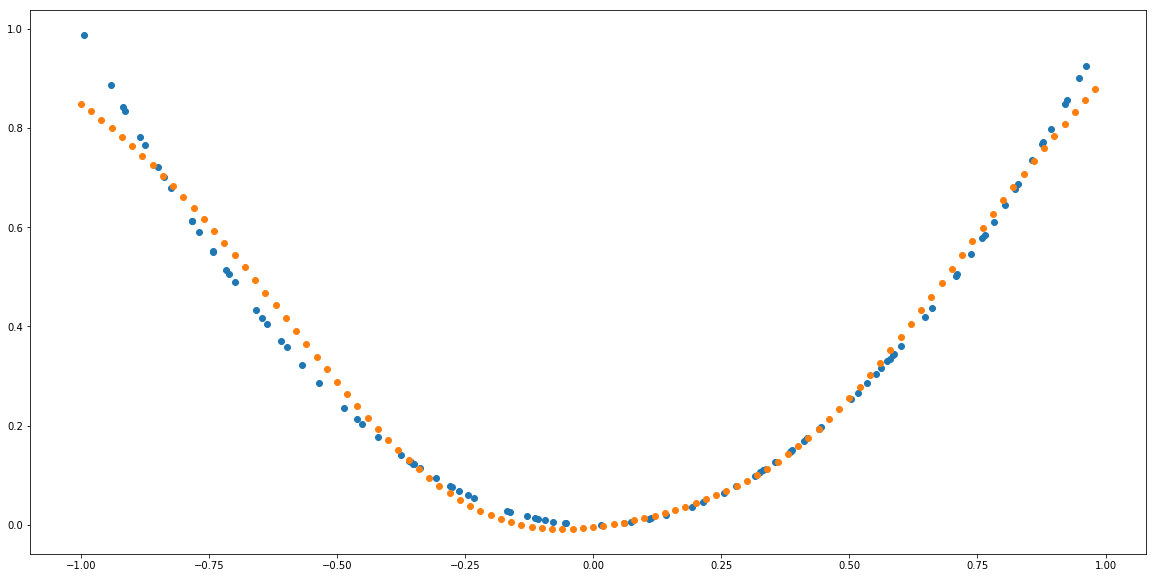

In [9]:
plt.plot(x,y,'o')
xx=[[2*(i*0.01-0.5)] for i in range(100)]
yy=[nn.evaluate(i)[0] for i in xx]
plt.plot(xx,yy,'o')

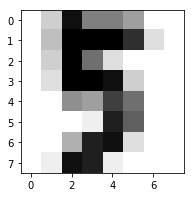

In [10]:
from sklearn import datasets
import numpy as np

import matplotlib.pyplot as plt

#Load the digits dataset
digits = datasets.load_digits()

#Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[35], cmap=plt.cm.gray_r, interpolation='nearest')


In [11]:
digit_nn = NeuralNetwork([64,16,10])